In [ ]:
# This notebook has been tested in Google colab
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
def loadDataSet(fileName):
  fr = open(fileName)
  stringArr = [line.strip().split(' ') for line in fr.readlines()]
  datArr = []
  for line in stringArr:
    temp = []
    for num in line:
      temp.append(float(num))
    datArr.append(temp)
  return np.mat(datArr)

In [ ]:
# Load Label
def loadLabel(fileName):
  fr = open(fileName)
  label = [line.strip().split(' ')[0] for line in fr.readlines()]
  return np.array(label)

In [ ]:
# Data Pre-processing
# Data imputation using mean value of feature
def replaceNanWithMean():
  dataMat = loadDataSet("/content/gdrive/My Drive/secom.data")
  numFeature = np.shape(dataMat)[1]
  for i in range(numFeature):
    meanVal = np.mean(dataMat[np.nonzero(~np.isnan(dataMat[:, i].A))[0], i])
    dataMat[np.nonzero(np.isnan(dataMat[:, i].A))[0], i] = meanVal
  return dataMat

[0.59254058 0.24123819 0.09150014 0.02300579 0.01459192 0.00518818
 0.00322658 0.00314677 0.0026308  0.00231307 0.00217535 0.00207282
 0.00169084 0.00125591 0.00120353 0.00114092 0.00111115 0.00092458
 0.00090503 0.00086145]


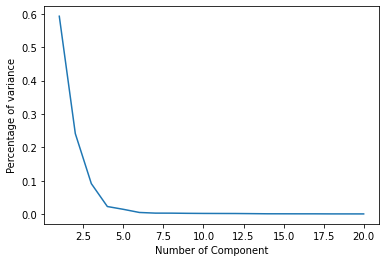

In [ ]:
dataMat = replaceNanWithMean()
# Feature selection, PCA
pca = PCA()
pca.fit(dataMat)
explained_variance_ratio_ = pca.explained_variance_ratio_
print(explained_variance_ratio_[:20])
x = range(1, 21)
plt.plot(x, explained_variance_ratio_[:20])
plt.xlabel('Number of Component')
plt.ylabel('Percentage of variance')
plt.show()

In [ ]:
# Keep the first six component, prepare the features and labels for training and testing
# Hold out 30% of the data for testing our classifier
dataMat = replaceNanWithMean()
scaler = StandardScaler()
scalerdataMat = scaler.fit_transform(dataMat)
pca = PCA(n_components=6)
features = pca.fit_transform(scalerdataMat)
print(features)
labels = loadLabel('/content/gdrive/My Drive/secom_labels.data')
print(labels)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.4, random_state=0)

[[-1.68842166  2.88115111  3.79761765 -2.65368832 -0.61332963 -1.19602125]
 [-2.23210711  0.79428316  2.80766116 -2.10107985 -0.61385171 -1.55422439]
 [ 0.41470599  1.12928252  1.25645994 -0.45965744  0.32398185  2.23059651]
 ...
 [-1.12189712 -1.49774904 -1.27285894  1.15178156 -0.52157315 -2.1193743 ]
 [-1.1428058  -3.12921678 -3.4468217   3.22664945  0.43956949  3.03321154]
 [ 2.00687932 -2.85023704 -2.32635627  3.90168427  0.82813803  3.87475746]]
['-1' '-1' '1' ... '-1' '-1' '-1']


In [ ]:
# Try logistic regression model
# Use GridSearch for better parameters "C"
# Use 10 fold cross validation
logistic = LogisticRegression(max_iter=2000)
params_logistic = {'C': np.logspace(-4, 4, 20)}
search_logistic = GridSearchCV(logistic, params_logistic, cv=10, scoring='neg_mean_squared_error',return_train_score=True)
search_logistic.fit(features_train, labels_train)
print(search_logistic.cv_results_)
print("Best parameter (CV score=%0.3f):" % search_logistic.best_score_)
print(search_logistic.best_params_)

{'mean_fit_time': array([0.00456929, 0.00410559, 0.0041672 , 0.00710778, 0.00554783,
       0.00617125, 0.00686069, 0.00723951, 0.00782385, 0.00793271,
       0.00754979, 0.0080353 , 0.0077126 , 0.009168  , 0.008058  ,
       0.00770564, 0.00764921, 0.00759273, 0.00734818, 0.00761261]), 'std_fit_time': array([0.0006493 , 0.00028603, 0.00022168, 0.00386129, 0.00050596,
       0.00095911, 0.00048514, 0.0007175 , 0.00166796, 0.00175213,
       0.00051059, 0.00138598, 0.00093091, 0.00358018, 0.00164947,
       0.00086142, 0.00071221, 0.00093806, 0.00045464, 0.00088316]), 'mean_score_time': array([0.00042951, 0.00044668, 0.00042517, 0.00060878, 0.00047441,
       0.00045569, 0.00047545, 0.00048008, 0.00048871, 0.0004827 ,
       0.00047181, 0.00050938, 0.00048919, 0.00049558, 0.00048797,
       0.00049608, 0.00045516, 0.00047984, 0.00045218, 0.00048606]), 'std_score_time': array([2.25764267e-05, 5.18096519e-05, 1.53320202e-05, 1.89809168e-04,
       3.27154774e-05, 2.05372524e-05, 3.0674716

In [ ]:
# Test logistic regression model on testing set
labels_predict = search_logistic.predict(features_test)
print(mean_squared_error(labels_test, labels_predict))
print(mean_absolute_error(labels_test, labels_predict))

0.22328548644338117
0.11164274322169059


In [ ]:
# Try Decision Tree model
# Use GridSearch for better parameters "max_depth"
# Use 10 fold cross validation
clf = DecisionTreeClassifier(random_state=0)
params_clf = {'max_depth': range(3, 20)}
search_clf = GridSearchCV(clf, params_clf, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
search_clf.fit(features_train, labels_train)
print(search_clf.cv_results_)
print("Best parameter (CV score=%0.3f):" % search_clf.best_score_)
print(search_clf.best_params_)

{'mean_fit_time': array([0.00500758, 0.00514798, 0.00548754, 0.0068171 , 0.00690119,
       0.00903223, 0.00580232, 0.00586095, 0.00620615, 0.0061872 ,
       0.0067075 , 0.00656829, 0.00649085, 0.00649576, 0.00672238,
       0.0066829 , 0.00687292]), 'std_fit_time': array([0.00223764, 0.00116756, 0.00021214, 0.00192483, 0.00086615,
       0.00454152, 0.00057001, 0.00014866, 0.00046964, 0.0002986 ,
       0.00057219, 0.00033805, 0.00034359, 0.00023424, 0.00067038,
       0.00050596, 0.00096804]), 'mean_score_time': array([0.00089817, 0.00090117, 0.00096381, 0.00127842, 0.00098951,
       0.00144601, 0.00065973, 0.00056822, 0.00061142, 0.00054619,
       0.00063076, 0.00064094, 0.00055571, 0.00053291, 0.00060017,
       0.00059431, 0.00060837]), 'std_score_time': array([9.61293422e-05, 4.96078884e-05, 1.22612732e-04, 8.50367399e-04,
       1.34889430e-04, 1.58272410e-03, 2.25528815e-04, 3.31924647e-05,
       1.32335553e-04, 2.17323341e-05, 1.42744658e-04, 1.51253245e-04,
       3.32668

In [ ]:
# Test Decision Tree model on testing set
labels_predict = search_clf.predict(features_test)
print(mean_squared_error(labels_test, labels_predict))
print(mean_absolute_error(labels_test, labels_predict))

0.2551834130781499
0.12759170653907495
